In [2]:
pip install shapely

Note: you may need to restart the kernel to use updated packages.



 COORDENADAS DE LAS INTERSECCIONES
Coordenadas de la primera intersección: POINT (0 -200) 
Coordenadas de la segunda intersección: POINT (899.9999999999999 399.9999999999999) 
Coordenadas de la tercera intersección: POINT (-100 -600) 
Coordenadas de la cuarta intersección: POINT (0 -400) 

 EVALUACIÓN DE LA FO EN LOS VÉRTICES
Función objetivo en la intersección 1: -600.0 
Función objetivo en la intersección 2: 2099.9999999999995 
Función objetivo en la intersección 3: -1900.0 
Función objetivo en la intersección 4: -1200.0 

 SOLUCIÓN ÓPTIMA
Solución óptima: 2099.9999999999995 pesos

 VARIABLES DE DECISIÓN
x: 899.9999999999999 
x_2: 399.9999999999999 


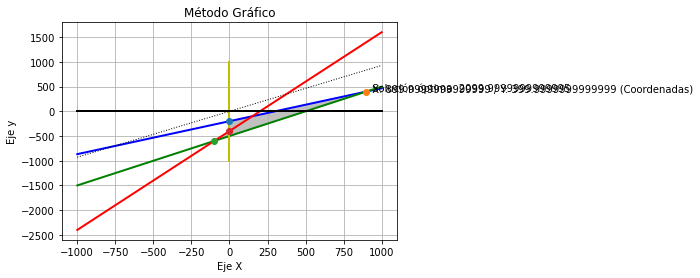

In [13]:
#Autor: Bryan Salazar López, Ing. M.Sc. (2021)
#Librerías necesarias
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import LineString

#Ecuaciones e intervalos (Para tabular)
x = np.arange(-1000, 1500, 500)
y = np.arange(-1000, 1500, 500)
y1 = (2/3)*x -200
y2 = 1*x -500
y3 = 2*x -400
x1 = 0 * y
y4 = 0 * x
z = (6.5/7)*x

#Identificadores para las líneas
primera_linea = LineString(np.column_stack((x, y1)))
segunda_linea = LineString(np.column_stack((x, y2)))
tercera_linea = LineString(np.column_stack((x, y3)))
cuarta_linea = LineString(np.column_stack((x1, y)))
quinta_linea = LineString(np.column_stack((x, y4)))
sexta_linea = LineString(np.column_stack((x, z)))

#Graficando las líneas
plt.plot(x, y1, '-', linewidth=2, color='b')
plt.plot(x, y2, '-', linewidth=2, color='g')
plt.plot(x, y3, '-', linewidth=2, color='r')
plt.plot(x1, y, '-', linewidth=2, color='y')
plt.plot(x, y4, '-', linewidth=2, color='k')
plt.plot(x, z, ':', linewidth=1, color='k')

#Generando las intersecciones (vértices)
primera_interseccion = cuarta_linea.intersection(primera_linea)
segunda_interseccion = primera_linea.intersection(segunda_linea)
tercera_interseccion = segunda_linea.intersection(tercera_linea)
cuarta_interseccion = tercera_linea.intersection(cuarta_linea)

#Graficando los vértices
plt.plot(*primera_interseccion.xy, 'o')
plt.plot(*segunda_interseccion.xy, 'o')
plt.plot(*tercera_interseccion.xy, 'o')
plt.plot(*cuarta_interseccion.xy, 'o')

#Imprimiendo las coordenadas de los vértices en la consola
print('\n COORDENADAS DE LAS INTERSECCIONES')
print('Coordenadas de la primera intersección: {} '.format(primera_interseccion))
print('Coordenadas de la segunda intersección: {} '.format(segunda_interseccion))
print('Coordenadas de la tercera intersección: {} '.format(tercera_interseccion))
print('Coordenadas de la cuarta intersección: {} '.format(cuarta_interseccion))

#Identificando los valores de las coordenadas x y y de cada vértice
xi1m, yi1m = primera_interseccion.xy
xi2m, yi2m = segunda_interseccion.xy
xi3m, yi3m = tercera_interseccion.xy
xi4m, yi4m = cuarta_interseccion.xy

#Cambiamos el formato de matriz a float
xi1 = np.float64(np.array(xi1m))
xi2 = np.float64(np.array(xi2m))
xi3 = np.float64(np.array(xi3m))
xi4 = np.float64(np.array(xi4m))
yi1 = np.float64(np.array(yi1m))
yi2 = np.float64(np.array(yi2m))
yi3 = np.float64(np.array(yi3m))
yi4 = np.float64(np.array(yi4m))

#Evaluando la función objetivo en cada vértice
FOi1 = (xi1 * 1) + (yi1 * 3)
FOi2 = (xi2 * 1) + (yi2 * 3)
FOi3 = (xi3 * 1) + (yi3 * 3)
FOi4 = (xi4 * 1) + (yi4 * 3)

#Imprimiendo las evaluaciones de la FO en cada vértice (Consola)
print('\n EVALUACIÓN DE LA FO EN LOS VÉRTICES')
print('Función objetivo en la intersección 1: {} '.format(FOi1))
print('Función objetivo en la intersección 2: {} '.format(FOi2))
print('Función objetivo en la intersección 3: {} '.format(FOi3))
print('Función objetivo en la intersección 4: {} '.format(FOi4))

#Calculando el mejor resultado (Maximizar)
ZMAX = max(FOi1, FOi2, FOi3, FOi4)

#Imprimiendo la solución óptima en la consola
print('\n SOLUCIÓN ÓPTIMA')
print('Solución óptima: {} pesos'.format(ZMAX))

#Ordenando las coordenadas de los vértices (Las coordenadas x en m y las coordenadas y en n)
m = [xi1, xi2, xi3, xi4]
n = [yi1, yi2, yi3, yi4]

#Graficando el polígono solución a partir de las coordenadas de los vértices 
plt.fill(m, n, color='silver')

#Identificando el índice del vértice de la mejor solución
dict1 = {0:FOi1, 1:FOi2, 2:FOi3, 3:FOi4}
posicion = max(dict1, key=dict1.get)

#Obteniendo las coordenadas del vértice de la mejor solución de acuerdo al índice
XMAX = m[posicion]
YMAX = n[posicion]

#Imprimiendo las coordenadas del vértice de la mejor solución (variables de decisión)
print('\n VARIABLES DE DECISIÓN')
print('x: {} '.format(XMAX))
print('x_2: {} '.format(YMAX))

#Generando las anotaciones de las coordenadas y solución óptima en el gráfico
plt.annotate('  X: {0} / Y: {1} (Coordenadas)'.format(XMAX, YMAX), (XMAX, YMAX))
plt.annotate('  Solución óptima: {}'.format(ZMAX), (XMAX, YMAX+3))


#Configuraciones adicionales del gráfico
plt.grid()
plt.xlabel('Eje X')
plt.ylabel('Eje y')
plt.title('Método Gráfico')

plt.show()